In [1]:
!pip install -r requirements.txt

Defaulting to user installation because normal site-packages is not writeable
  Obtaining dependency information for gitpython>=3.1.30 from https://files.pythonhosted.org/packages/8d/c4/82b858fb6483dfb5e338123c154d19c043305b01726a67d89532b8f8f01b/GitPython-3.1.40-py3-none-any.whl.metadata
  Using cached GitPython-3.1.40-py3-none-any.whl.metadata (12 kB)
  Obtaining dependency information for gitdb<5,>=4.0.1 from https://files.pythonhosted.org/packages/fd/5b/8f0c4a5bb9fd491c277c21eff7ccae71b47d43c4446c9d0c6cff2fe8c2c4/gitdb-4.0.11-py3-none-any.whl.metadata
  Using cached gitdb-4.0.11-py3-none-any.whl.metadata (1.2 kB)
Using cached GitPython-3.1.40-py3-none-any.whl (190 kB)
Using cached gitdb-4.0.11-py3-none-any.whl (62 kB)


In [4]:
import torch
from matplotlib import pyplot as plt
import numpy as np
import cv2

In [5]:
model = torch.hub.load('ultralytics/yolov5','yolov5s')

Using cache found in C:\Users\sriva/.cache\torch\hub\ultralytics_yolov5_master
YOLOv5  2023-12-12 Python-3.11.5 torch-2.1.1+cu118 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


In [6]:
model

AutoShape(
  (model): DetectMultiBackend(
    (model): DetectionModel(
      (model): Sequential(
        (0): Conv(
          (conv): Conv2d(3, 32, kernel_size=(6, 6), stride=(2, 2), padding=(2, 2))
          (act): SiLU(inplace=True)
        )
        (1): Conv(
          (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
          (act): SiLU(inplace=True)
        )
        (2): C3(
          (cv1): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv2): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv3): Conv(
            (conv): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (m): Sequential(
            (0): Bottleneck(
              (cv1): Conv(
                (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1))
  

In [18]:
img = 'https://media.cntraveler.com/photos/53e2f41cdddaa35c30f66775/16:9/w_1280,c_limit/highway-traffic.jpg'

In [19]:
result = model(img)
result.print()

image 1/1: 768x1024 14 persons, 34 cars, 1 motorcycle, 1 truck
Speed: 3846.3ms pre-process, 207.3ms inference, 4.1ms NMS per image at shape (1, 3, 480, 640)


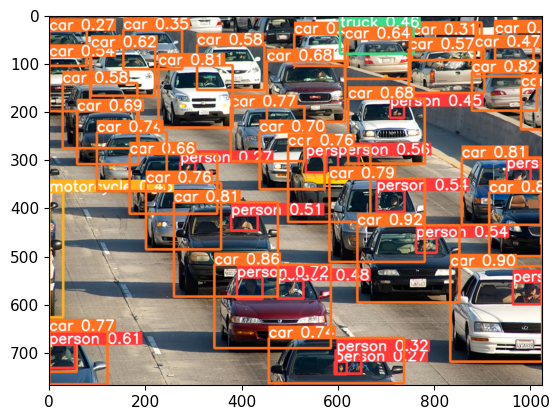

In [20]:
%matplotlib inline
plt.imshow(np.squeeze(result.render()))
plt.show()

In [24]:
import cv2
cap = cv2.VideoCapture(0)
while cap.isOpened():
    ret, frame = cap.read()
    
    #make detections
    results = model(frame)
    
    cv2.imshow('YOLO',np.squeeze(results.render()))
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()